# Classification with DNN and Pen&Paper

In this task we will explore the analytic solution of DNN classifications.

## Introduction
We will create data from two Gaussian distributions and train a classification between them.
In parallel we will take pen and paper to calculate the solution of the classification.
Then we will compare the results of our network training and our pen and paper calculation.

In [43]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

## Creating and plotting the data
First we fix the parametrisation of our Gaussian distributions (A and B) and create the data.

In [44]:
# parametrisation of the underlying probability distributions
loc_a, scale_a = 0, 1.5
loc_b, scale_b = 1, 1.2

# creating the data
a = np.random.normal(loc=loc_a, scale=scale_a, size=(100000,))
b = np.random.normal(loc=loc_b, scale=scale_b, size=(100000,))

We bin the data in histograms with equidistant bins, plot the histograms and plot (parts of) the raw data.

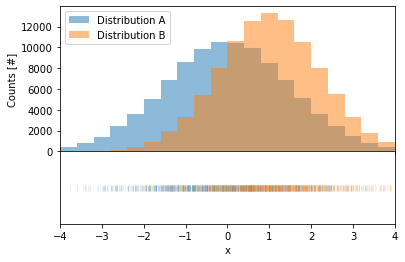

In [45]:
# creating the figure
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex='col', gridspec_kw={'height_ratios': [2, 1], "hspace": 0})

# plot histograms
hist_a, bins_a, _ = ax1.hist(a, bins=np.arange(-4, 4.4, 0.4), alpha=0.5, label="Distribution A")
hist_b, bins_b, _ = ax1.hist(b, bins=bins_a, alpha=0.5, label="Distribution B")

# plot 1000 example points
ax2.plot(a[:1000], np.zeros_like(a)[:1000], linestyle="None", marker="|", alpha=0.1)
ax2.plot(b[:1000], np.zeros_like(b)[:1000], linestyle="None", marker="|", alpha=0.1)

# styling plot
ax2.axes.get_yaxis().set_visible(False)
ax2.set_xlabel("x")
ax1.set_ylabel("Counts [#]")
ax2.set_xlim([-4, 4])
ax1.legend()

## DNN based Classification

Now create a DNN model for the classification between Distribution A and Distribution B.
- How many inputs do we have?
- How many outputs do we have?
- How many layers with which activation funcitons do we need?
- Does the network output probabilities or logits?

In [46]:
"""
TODO: Create the model
"""
model = tf.keras.Sequential(
    layers=[
        tf.keras.Input(shape=(1,)),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

Now compile the model.
- Which loss function do we want?
- Which optimizer do we want?

In [47]:
"""
TODO: Compile the model
"""
optimizer = "sgd"
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

Look at the model summary to see how many trainable parameters or model has.

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


Now we prepare the data for the training by interleaving datasets A and B and shuffling the data.

In [49]:
# prepare the data for training (interleave+shuffle)
x = np.concatenate([a, b])
y = np.concatenate([np.ones_like(a), np.zeros_like(b)])
p = np.random.permutation(len(x))
x, y = x[p], y[p]

Now we fit the model to the training data:

In [50]:
# fit the model
model.fit(x=x, y=y, epochs=5, validation_split=0.2)

Epoch 1/5
5000/5000 [==============================] - 7s 1ms/step - loss: 0.6348 - accuracy: 0.6359 - val_loss: 0.6210 - val_accuracy: 0.6504
Epoch 2/5
5000/5000 [==============================] - 5s 1ms/step - loss: 0.6214 - accuracy: 0.6501 - val_loss: 0.6208 - val_accuracy: 0.6507
Epoch 3/5
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6217 - accuracy: 0.6486 - val_loss: 0.6205 - val_accuracy: 0.6509
Epoch 4/5
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6208 - accuracy: 0.6494 - val_loss: 0.6205 - val_accuracy: 0.6510
Epoch 5/5
5000/5000 [==============================] - 6s 1ms/step - loss: 0.6217 - accuracy: 0.6503 - val_loss: 0.6204 - val_accuracy: 0.6508


## Plotting and Results
In the following cells we will plot the analytic solution, our training solution and the analytic solution using the actual data distributions which were used for the training.

In [51]:
# define x_values for inference and plotting
x_values = np.arange(-4, 4.01, 0.01)[:, None]

In [52]:
# analytic solution
def gaussian(x, loc, scale):
    return 1 / np.sqrt(2 * np.pi * scale ** 2) * np.exp(-((x - loc) ** 2) / (2 * scale ** 2))

gauss_a = gaussian(x_values, loc=loc_a, scale=scale_a)
gauss_b = gaussian(x_values, loc=loc_b, scale=scale_b)
analytic = gauss_a / (gauss_a + gauss_b)

In [53]:
# classic solution by histogram division
hist = hist_a / (hist_a + hist_b)

In [54]:
# DNN based classification solution
pred = model.predict(x_values)

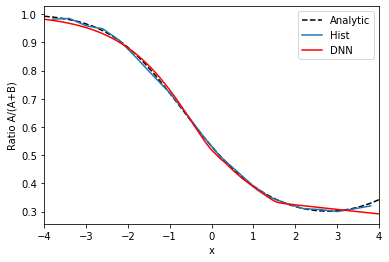

In [55]:
# plot all the infered ratios
plt.plot(x_values, analytic, label="Analytic", color="black", linestyle="--")
plt.plot((bins_a[1:]+bins_a[:-1])/2, hist, label="Hist")
plt.plot(x_values, pred, label="DNN", color="red")
plt.xlabel("x")
plt.ylabel("Ratio A/(A+B)")
plt.xlim([-4, 4])
plt.legend()

As you can see, the all three distributions match quite well!

## Summary

This concludes our tutorial for today.

In this tutorial you learned:
- How to train a neural network based classification task
- How to predict the output of the trained network using pen and paper